# Importing Libraries

In [1]:
#Importing libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import pandas_datareader.data as web
import yfinance as yf
import random

In [2]:
!pip install --upgrade pandas-datareader
#upgrade pandas datareader

Extracting data from Yahoo finance

In [3]:
start = "2018-01-01"
end = "2022-09-27"
tickers = ['HDFCBANK.NS','DLF.NS','INFY.NS','MARUTI.NS', 'SUNPHARMA.NS', 'ITC.NS']
stocks= pd.DataFrame()

In [4]:
for ticker in tickers:
    df2 = web.DataReader(ticker,'yahoo',start,end)
    print(ticker, "done")
    stocks[ticker] = df2['Adj Close']

HDFCBANK.NS done
DLF.NS done
INFY.NS done
MARUTI.NS done
SUNPHARMA.NS done
ITC.NS done


In [5]:
stocks.to_csv("data_final_pakka.csv")

In [6]:
stocks.head()

,HDFCBANK.NS,DLF.NS,INFY.NS,MARUTI.NS,SUNPHARMA.NS,ITC.NS
Date,,,,,,
2018-01-01,899.247742,245.263779,460.407776,9150.264648,550.958862,218.016327
2018-01-02,907.903259,242.588516,458.692688,9057.500000,549.135254,216.728043
2018-01-03,898.350647,246.792496,454.950775,8927.193359,546.159973,217.060471
2018-01-04,901.866211,246.028137,452.322632,8898.420898,557.821167,217.392960
2018-01-05,903.660339,248.368973,450.808044,8943.545898,555.469727,218.515045


In [7]:
stocks.tail()

,HDFCBANK.NS,DLF.NS,INFY.NS,MARUTI.NS,SUNPHARMA.NS,ITC.NS
Date,,,,,,
2022-09-21,1518.349976,379.750000,1377.250000,9247.900391,905.299988,340.950012
2022-09-22,1486.000000,380.700012,1367.949951,9401.849609,908.000000,345.049988
2022-09-23,1446.150024,369.950012,1365.449951,9343.450195,921.099976,346.399994
2022-09-26,1426.650024,352.049988,1380.250000,8834.950195,900.700012,332.600006
2022-09-27,1413.849976,350.750000,1393.550049,8774.049805,897.150024,334.850006


<AxesSubplot:xlabel='Date'>

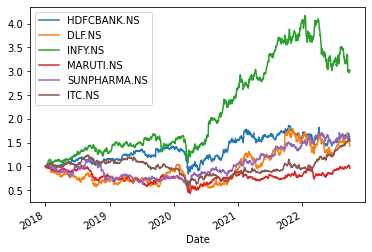

In [8]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

Calculating daily returns

In [9]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,HDFCBANK.NS,DLF.NS,INFY.NS,MARUTI.NS,SUNPHARMA.NS,ITC.NS
Date,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,0.009579,-0.010968,-0.003732,-0.010190,-0.003315,-0.005927
2018-01-03,-0.010577,0.017181,-0.008191,-0.014491,-0.005433,0.001533
2018-01-04,0.003906,-0.003102,-0.005794,-0.003228,0.021126,0.001531
2018-01-05,0.001987,0.009470,-0.003354,0.005058,-0.004224,0.005148


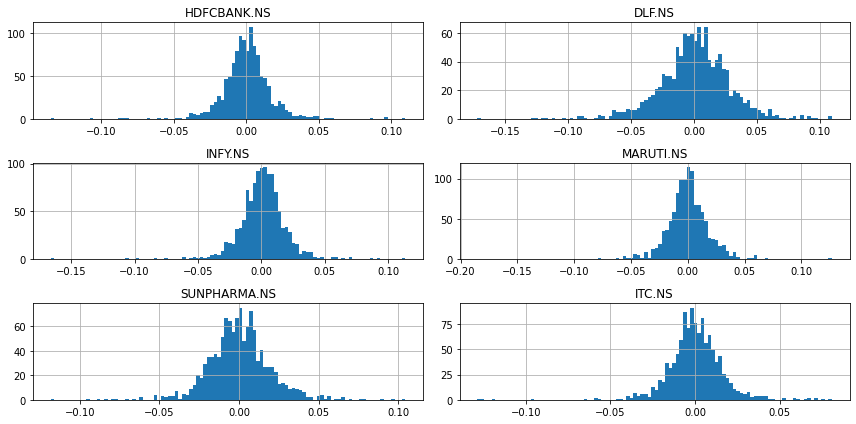

In [10]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [11]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HDFCBANK.NS,1170.0,0.000387,0.017122,-0.134754,-0.007720,0.000279,0.008282,0.109747
DLF.NS,1170.0,0.000306,0.028813,-0.172233,-0.014186,0.001547,0.017248,0.109720
INFY.NS,1170.0,0.000947,0.018415,-0.166121,-0.008437,0.001405,0.010249,0.113627
MARUTI.NS,1170.0,-0.000036,0.020855,-0.185236,-0.009335,-0.000236,0.009640,0.126764
SUNPHARMA.NS,1170.0,0.000417,0.020209,-0.118297,-0.010574,0.000037,0.010470,0.104469
ITC.NS,1170.0,0.000367,0.017057,-0.128740,-0.007838,0.000000,0.008986,0.080969


Annualizing Returns 

In [12]:
E_r_annualized = log_ret.mean() * 252

In [13]:
E_r_annualized

HDFCBANK.NS     0.097464
DLF.NS          0.077052
INFY.NS         0.238538
MARUTI.NS      -0.009043
SUNPHARMA.NS    0.105014
ITC.NS          0.092424
dtype: float64

Calculating Annualized covariance

In [14]:
cov_annualized = log_ret.cov()*252 # multiply by days

In [15]:
cov_annualized

,HDFCBANK.NS,DLF.NS,INFY.NS,MARUTI.NS,SUNPHARMA.NS,ITC.NS
HDFCBANK.NS,0.073875,0.053443,0.024586,0.041450,0.018814,0.024747
DLF.NS,0.053443,0.209215,0.028755,0.068302,0.048043,0.048747
INFY.NS,0.024586,0.028755,0.085456,0.023653,0.021745,0.016549
MARUTI.NS,0.041450,0.068302,0.023653,0.109600,0.028221,0.024726
SUNPHARMA.NS,0.018814,0.048043,0.021745,0.028221,0.102917,0.022825
ITC.NS,0.024747,0.048747,0.016549,0.024726,0.022825,0.073318


<AxesSubplot:>

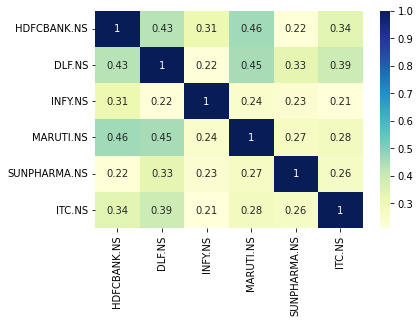

In [16]:
corr = log_ret.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')

Extracting Market Data from yahoo finance

In [17]:
#Download Market index closing prices
nifty_df = yf.download('^NSEI',start='2018-01-01', 
                      end='2022-09-28', 
                      progress=False,interval ='1d',
)
nifty_df["Adj Close"].to_csv("daily_market_return.csv")

Calculating Market daily returns

In [18]:
#Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
print(nifty_df['Return_NIFTY']) 

Date
2018-01-02         NaN
2018-01-03    0.000096
2018-01-04    0.005881
2018-01-05    0.005132
2018-01-08    0.006114
                ...   
2022-09-21   -0.005510
2022-09-22   -0.005010
2022-09-23   -0.017305
2022-09-26   -0.018114
2022-09-27   -0.000523
Name: Return_NIFTY, Length: 1167, dtype: float64


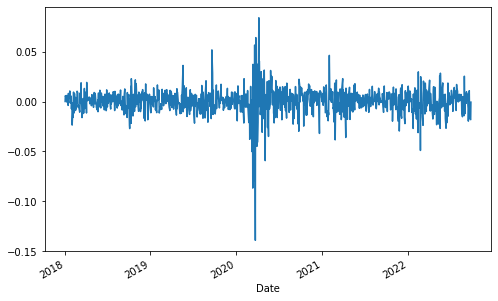

In [19]:
nifty_df['Return_NIFTY'].plot(figsize=(8,5))
plt.show()

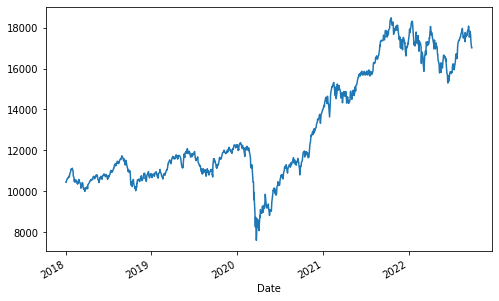

In [20]:
nifty_df['Adj Close'].plot(figsize=(8,5))
plt.show()

Dropping the nan values

In [21]:
nifty_df = nifty_df.dropna(axis=0)
nifty_df.head()

,Open,High,Low,Close,Adj Close,Volume,Return_NIFTY
Date,,,,,,,
2018-01-03,10482.650391,10503.599609,10429.549805,10443.200195,10443.200195,167300,0.000096
2018-01-04,10469.400391,10513.000000,10441.450195,10504.799805,10504.799805,174900,0.005881
2018-01-05,10534.250000,10566.099609,10520.099609,10558.849609,10558.849609,180900,0.005132
2018-01-08,10591.700195,10631.200195,10588.549805,10623.599609,10623.599609,169000,0.006114
2018-01-09,10645.099609,10659.150391,10603.599609,10637.000000,10637.000000,205000,0.001261


Creating Dataframes of daily returns of each asset

In [22]:
returns = pd.DataFrame()

In [23]:
for column in stocks.columns:
    #Caclulate log returns
    returns[f'{column}_return'] = np.log(stocks[column]/stocks[column].shift(1))
    print(returns[f'{column}_return'])

Date
2018-01-01         NaN
2018-01-02    0.009579
2018-01-03   -0.010577
2018-01-04    0.003906
2018-01-05    0.001987
                ...   
2022-09-21   -0.001547
2022-09-22   -0.021536
2022-09-23   -0.027183
2022-09-26   -0.013576
2022-09-27   -0.009013
Name: HDFCBANK.NS_return, Length: 1171, dtype: float64
Date
2018-01-01         NaN
2018-01-02   -0.010968
2018-01-03    0.017181
2018-01-04   -0.003102
2018-01-05    0.009470
                ...   
2022-09-21   -0.031621
2022-09-22    0.002499
2022-09-23   -0.028644
2022-09-26   -0.049595
2022-09-27   -0.003699
Name: DLF.NS_return, Length: 1171, dtype: float64
Date
2018-01-01         NaN
2018-01-02   -0.003732
2018-01-03   -0.008191
2018-01-04   -0.005794
2018-01-05   -0.003354
                ...   
2022-09-21   -0.008171
2022-09-22   -0.006776
2022-09-23   -0.001829
2022-09-26    0.010781
2022-09-27    0.009590
Name: INFY.NS_return, Length: 1171, dtype: float64
Date
2018-01-01         NaN
2018-01-02   -0.010190
2018-01-03   -0.014

In [24]:
returns = returns.dropna(axis=0)
returns = returns.iloc[1: , :]
returns.head()

,HDFCBANK.NS_return,DLF.NS_return,INFY.NS_return,MARUTI.NS_return,SUNPHARMA.NS_return,ITC.NS_return
Date,,,,,,
2018-01-03,-0.010577,0.017181,-0.008191,-0.014491,-0.005433,0.001533
2018-01-04,0.003906,-0.003102,-0.005794,-0.003228,0.021126,0.001531
2018-01-05,0.001987,0.009470,-0.003354,0.005058,-0.004224,0.005148
2018-01-08,-0.001611,0.001153,0.023487,0.001599,0.021960,0.010218
2018-01-09,0.001665,0.036224,0.005103,-0.006945,-0.008658,0.018465


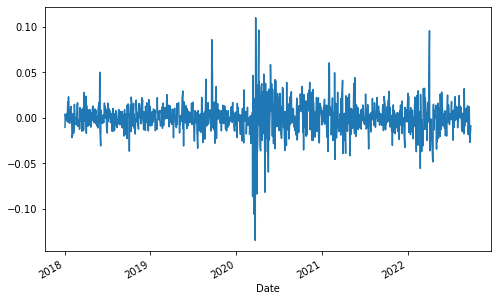

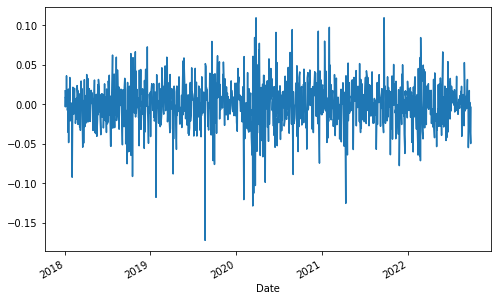

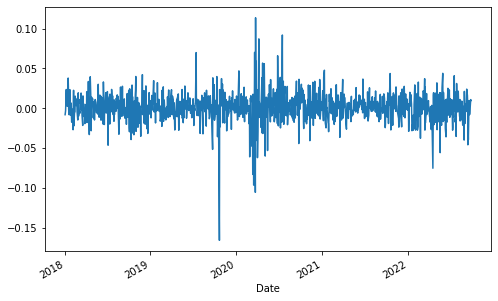

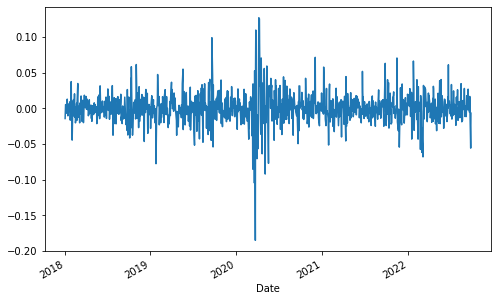

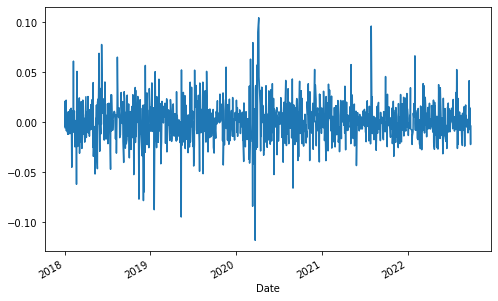

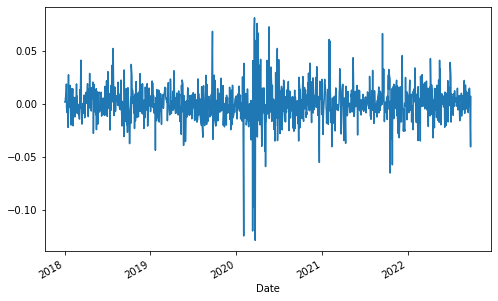

In [25]:
for column in returns.columns:
    returns[f'{column}'].plot(figsize=(8,5))
    plt.show()

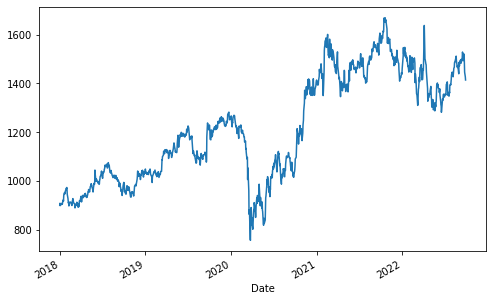

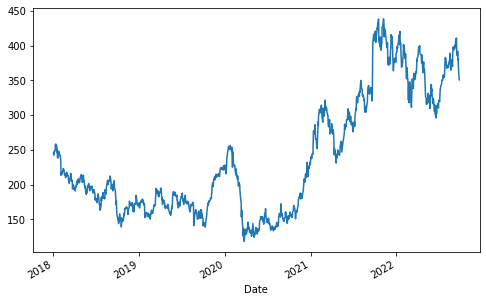

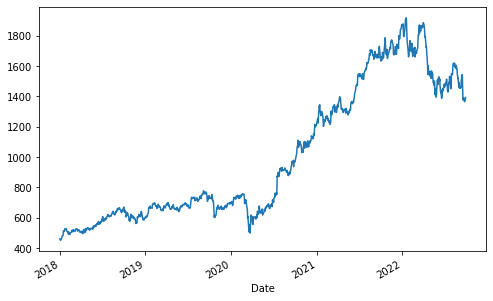

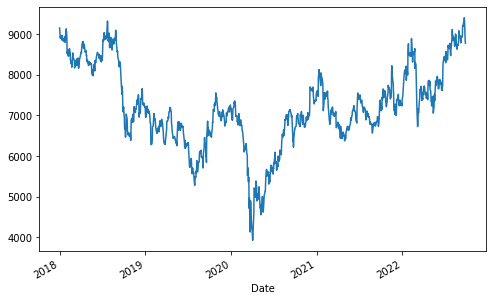

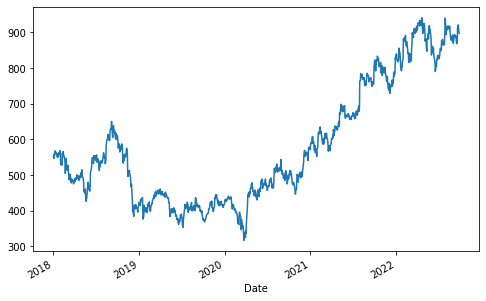

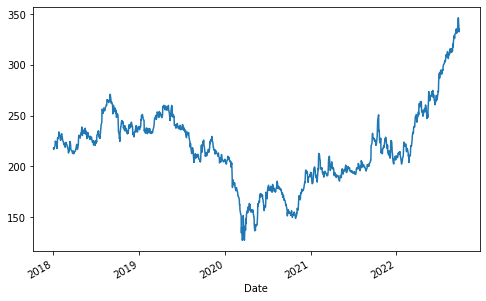

In [26]:
for column in stocks.columns:
    stocks[f'{column}'].plot(figsize=(8,5))
    plt.show()

In [27]:
beta_dict = {}
for column in returns.columns:
    combined = pd.merge(nifty_df['Return_NIFTY'],returns[f'{column}'],how='inner',on='Date')
    x = combined['Return_NIFTY']
    y = combined[f'{column}']
    x_sm = sm.add_constant(x)
    #Regression - Market model 
    model = sm.OLS(y,x_sm)
    results = model.fit()
    p_value = results.pvalues[1]
    if p_value < 0.05:
        beta = results.params[1]
    else:
        beta = 0
    beta_dict[column] = [beta, results.scale]

In [28]:
beta_dict

{'HDFCBANK.NS_return': [1.0448851522053124, 0.00012134882772310062],
 'DLF.NS_return': [1.464582751824466, 0.0004939780030037699],
 'INFY.NS_return': [0.7933503243046499, 0.00024059373279364368],
 'MARUTI.NS_return': [1.0773286521416297, 0.0002529478120667138],
 'SUNPHARMA.NS_return': [0.6708051172754336, 0.0003387993489274433],
 'ITC.NS_return': [0.7165239033264428, 0.00021075763928765534]}

Extracting riskfree data from risk_free.csv

In [29]:
rf_df = pd.read_csv("risk_free.csv")
rf_df.head()

,DATE,rf
0,01/01/20,0.000132
1,02/01/20,0.000132
2,03/01/20,0.000396
3,06/01/20,0.000132
4,07/01/20,0.000132


annualizing the risk-free rate

In [30]:
rfr = rf_df.mean()[0]*252
rfr = 0.065

annualizing the market rate

In [31]:
rm = nifty_df['Return_NIFTY'].mean()*252
rm

0.10542358610138078

Calculating the returns of each asset through CAPM

In [32]:
E_R_CAPM = {}
mkt_premium = rm-rfr
for key,value in beta_dict.items():
    x = rfr + value[0]*mkt_premium
    E_R_CAPM[f"{key}"] = x

In [33]:
E_R_CAPM.values()

dict_values([0.10723800491622582, 0.1242036869709735, 0.09707006514308739, 0.10854948752933166, 0.09211634841543032, 0.0939644656998139])

Annualizing the market Variance

In [34]:
var_mkt = nifty_df["Return_NIFTY"].var()*252
var_mkt

0.03984632837417004

Appending variance of each asset in beta_dict

In [35]:
for key,value in beta_dict.items():
    beta_dict[key].append(value[0]*value[0]*var_mkt + value[1]*252)

In [36]:
beta_dict

{'HDFCBANK.NS_return': [1.0448851522053124,
  0.00012134882772310062,
  0.07408352746505315],
 'DLF.NS_return': [1.464582751824466,
  0.0004939780030037699,
  0.20995293619199065],
 'INFY.NS_return': [0.7933503243046499,
  0.00024059373279364368,
  0.08570908849771865],
 'MARUTI.NS_return': [1.0773286521416297,
  0.0002529478120667138,
  0.10998997265123592],
 'SUNPHARMA.NS_return': [0.6708051172754336,
  0.0003387993489274433,
  0.10330746706205277],
 'ITC.NS_return': [0.7165239033264428,
  0.00021075763928765534,
  0.07356828924982839]}

Calculating the variance and covariance matrix

In [37]:
lst1 = list()
for key1, value1 in beta_dict.items():
    lst2 = list()
    for key2, value2 in beta_dict.items():
        if value1 == value2:
            lst2.append(value1[2])
        else:
            lst2.append(value1[0]*value2[0]*var_mkt)
    lst1.append(lst2)

In [38]:
cov_matrix = np.array(lst1, dtype=float)
cov_matrix

array([[0.07408353, 0.06097766, 0.03303101, 0.0448544 , 0.02792886,
        0.02983236],
       [0.06097766, 0.20995294, 0.04629853, 0.06287101, 0.03914701,
        0.04181508],
       [0.03303101, 0.04629853, 0.08570909, 0.03405662, 0.02120556,
        0.02265082],
       [0.0448544 , 0.06287101, 0.03405662, 0.10998997, 0.02879605,
        0.03075865],
       [0.02792886, 0.03914701, 0.02120556, 0.02879605, 0.10330747,
        0.01915205],
       [0.02983236, 0.04181508, 0.02265082, 0.03075865, 0.01915205,
        0.07356829]])

Optimizing for No rf and no shortselling

In [39]:
############### Efficient Frontier using opti ################
############### No rf no shortsell ###########################
expected_returns=np.array(list(E_R_CAPM.values()))
annualised_mean = expected_returns
from scipy.optimize import minimize, Bounds, LinearConstraint
W = np.ones((annualised_mean.shape[0],1))*(1.0/annualised_mean[0])
W.reshape(annualised_mean.shape)
# Function that runs optimizer
def optimizer(func, W, exp_ret, cov_matrix):
    opt_bounds = Bounds(0, 1)
    opt_constraints = ({'type': 'eq',
                        'fun': lambda W: 1.0 - np.sum(W)},
                    #    {'type': 'eq',
                    #     'fun': lambda W: target_return - W.T@exp_ret}
                    )
    optimal_weights = minimize(func, W, 
                               args=(exp_ret, cov_matrix),
                               method='SLSQP',
                               bounds=opt_bounds,
                               constraints=opt_constraints)
    return optimal_weights['x']
def min_variance(W, exp_ret, cov_matrix):
    return (W.T@cov_matrix@W)**0.5

# -((W.T@exp_ret) / 
x = optimizer(min_variance, W, annualised_mean,cov_matrix) #### WEIGHTS FOR MIN_VAR PORTFOLIO 
x


array([0.18546111, 0.        , 0.22791617, 0.072399  , 0.20778035,
       0.30644337])

0.1986265877779168


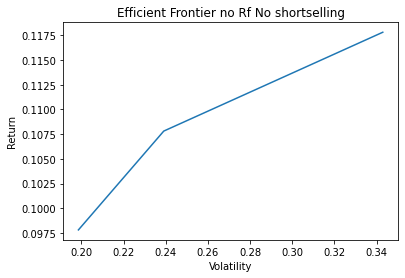

In [40]:
from numpy.lib.function_base import append
mv_return=x.T@annualised_mean #return corresponding to MVP
def optimizer_target(func, W, exp_ret, cov_matrix, target_return):
    opt_bounds = Bounds(0, 1)
    opt_constraints = ({'type': 'eq',
                        'fun': lambda W: 1.0 - np.sum(W)},
                       {'type': 'eq',
                        'fun': lambda W: target_return - W.T@exp_ret}
                    )
    optimal_weights = minimize(func, W, 
                               args=(exp_ret, cov_matrix),
                               method='SLSQP',
                               bounds=opt_bounds,
                               constraints=opt_constraints)
    return optimal_weights['x']
returns_list=[]
risk_list=[]
for i in np.arange (mv_return ,annualised_mean.max(),0.01):
    x = np.ones((annualised_mean.shape[0],1))*(1.0/annualised_mean[0])
    x = optimizer_target(min_variance, W, annualised_mean,cov_matrix, target_return=i)
    returns_list.append(x.T@annualised_mean)
    risk_list.append((x.T@cov_matrix@x)**0.5)

print(np.array(risk_list).min())
plt.title("Efficient Frontier no Rf No shortselling")

plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(risk_list,returns_list)    

array([ 15.40250705,  18.64365363, -10.46193457,   9.62968366,
       -13.80578242, -18.40812735])

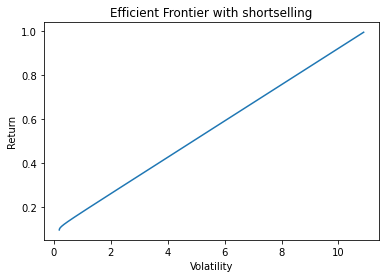

In [41]:
W = np.ones((annualised_mean.shape[0],1))*(1.0/annualised_mean[0])
W.reshape(annualised_mean.shape)

def optimizer_no_bounds(func, W, exp_ret, cov_matrix):
    
    opt_constraints = ({'type': 'eq',
                        'fun': lambda W: 1.0 - np.sum(W)},
                    #    {'type': 'eq',
                    #     'fun': lambda W: target_return - W.T@exp_ret}
                    )
    optimal_weights = minimize(func, W, 
                               args=(exp_ret, cov_matrix),
                               method='SLSQP',
                            #    bounds=opt_bounds,
                               constraints=opt_constraints)
    return optimal_weights['x']
def optimizer_no_bounds_target(func, W, exp_ret, cov_matrix, target_return):
    
    opt_constraints = ({'type': 'eq',
                        'fun': lambda W: 1.0 - np.sum(W)},
                       {'type': 'eq',
                        'fun': lambda W: target_return - W.T@exp_ret}
                    )
    optimal_weights = minimize(func, W, 
                               args=(exp_ret, cov_matrix),
                               method='SLSQP',
                            #    bounds=opt_bounds,
                               constraints=opt_constraints)
    return optimal_weights['x']
def min_variance(W, exp_ret, cov_matrix):
    return (W.T@cov_matrix@W)**0.5
x = np.ones((annualised_mean.shape[0],1))*(1.0/annualised_mean[0])
x = optimizer_no_bounds(min_variance, x, annualised_mean,cov_matrix)

mv_return2=x@annualised_mean
mv_risk2=(x.T@cov_matrix@x)**0.5

returns_list=[]
risk_list=[]

for i in np.arange (mv_return2,mv_return2+0.9,0.001):
    x = np.ones((annualised_mean.shape[0],1))*(1.0/annualised_mean[0])
    x = optimizer_no_bounds_target(min_variance, x, annualised_mean,cov_matrix, target_return=i)
    returns_list.append(x.T@annualised_mean)
    risk_list.append((x.T@cov_matrix@x)**0.5)
    # sharpe_list.append((x@annualised_mean-0.0364)/(x.T@cov@x**0.5))

plt.title("Efficient Frontier with shortselling")
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(risk_list,returns_list)
x

Optimizing for rf and shortselling

Text(0, 0.5, 'Return')

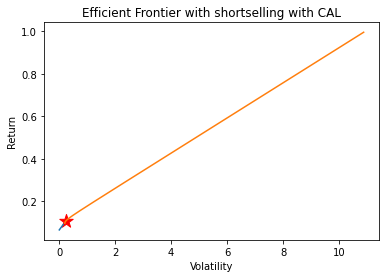

In [42]:
def max_sharpe(W, exp_ret, cov_matrix):
    return -((W@annualised_mean)-rfr)/((W.T@cov_matrix@W)**0.5)
def sharpe_optimizer(func, W, exp_ret, cov_matrix):
    
    opt_constraints = ({'type': 'eq',
                        'fun': lambda W: 1.0 - np.sum(W)},
                    #    {'type': 'eq',
                    #     'fun': lambda W: target_return - W.T@exp_ret}
                    )
    optimal_weights = minimize(func, W, 
                               args=(exp_ret, cov_matrix),
                               method='SLSQP',
                               constraints=opt_constraints)
    return optimal_weights['x']
x = np.ones((annualised_mean.shape[0],1))*(1.0/annualised_mean[0])
x = sharpe_optimizer(max_sharpe, W, annualised_mean,cov_matrix)

red_point_x=((x.T@cov_matrix@x)**0.5)
red_point_y=x@annualised_mean
plt.scatter(red_point_x,red_point_y,color='r',s=200,marker='*')
sp_optimized=((x@annualised_mean)-rfr)/((x.T@cov_matrix@x)**0.5)
y=[]
x_coord=np.arange(0,0.15,0.02)
for i in x_coord:
    y.append(rfr+(sp_optimized*i))

plt.plot(x_coord,y)
plt.plot(risk_list,returns_list)
plt.title("Efficient Frontier with shortselling with CAL")
plt.xlabel('Volatility')
plt.ylabel('Return')

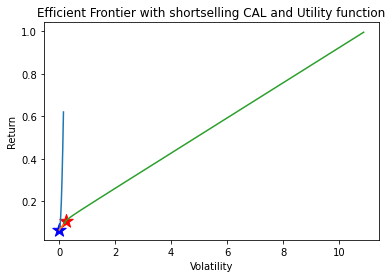

In [43]:
A=50
var_cov_matrix=np.zeros((2,2))
var_cov_matrix[0][0]=x.T@cov_matrix@x
e_r_matrix=[[x@annualised_mean],[rfr]]
e_r_matrix=np.array(e_r_matrix)
e_r_matrix.reshape((2,1))
weights = np.array(np.random.random(2))
    # Rebalance Weights
weights = weights / np.sum(weights)
weights.reshape(1,2)
def util_max(W, exp_ret, cov_matrix):
    return -(W@exp_ret-0.5*A*(W.T@cov_matrix@W))
def utility_optimizer(func, W, exp_ret, cov_matrix):
    
    opt_constraints = ({'type': 'eq',
                        'fun': lambda W: 1.0 - np.sum(W)},
                    #    {'type': 'eq',
                    #     'fun': lambda W: target_return - W.T@exp_ret}
                    )
    optimal_weights = minimize(func, W, 
                               args=(exp_ret, cov_matrix),
                               method='SLSQP',
                               constraints=opt_constraints)
    return optimal_weights['x']
x = utility_optimizer(util_max, weights,e_r_matrix,var_cov_matrix)
utility=x@e_r_matrix-0.5*A*(x.T@var_cov_matrix@x)
utility
x_util_coord=np.arange(0,0.15,0.001)
y_util_coord=[]
for i in x_util_coord:
    y_util_coord.append((utility+0.5*A*((i)**2)))
plt.title("Efficient Frontier with shortselling CAL and Utility function")
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(x_util_coord,y_util_coord)
plt.plot(x_coord,y)
plt.plot(risk_list,returns_list)
plt.scatter(((x.T@var_cov_matrix@x)**0.5),x@e_r_matrix,color='b',s=200,marker='*')
plt.scatter(red_point_x,red_point_y,color='r',s=200,marker='*')